In [1]:
import numpy as np 
import pandas as pd 

In [2]:
dataset = pd.read_csv('/kaggle/input/housing-csv/Housing.csv')

In [3]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
dataset.shape

(545, 13)

<Axes: xlabel='area', ylabel='price'>

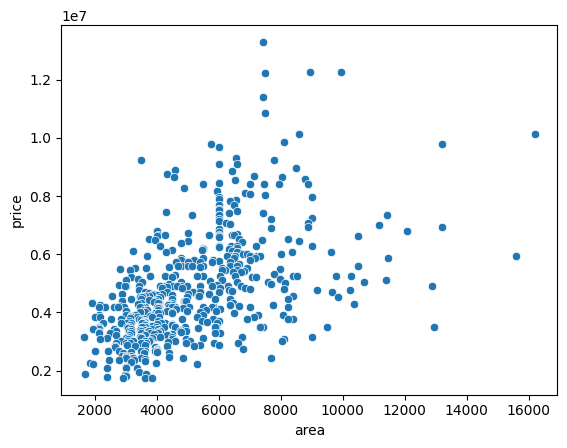

In [5]:
import seaborn as sns
sns.scatterplot(dataset, x='area', y='price')

In [6]:
low_P,high_P = dataset['price'].quantile([0.05,0.95])
low_A,high_A = dataset['area'].quantile([0.05,0.95])

In [7]:
dataset_without_outliers = dataset[dataset['price'].between(low_P,high_P) & dataset['area'].between(low_A,high_A)]

In [8]:
dataset_without_outliers.shape

(450, 13)

<Axes: xlabel='area', ylabel='price'>

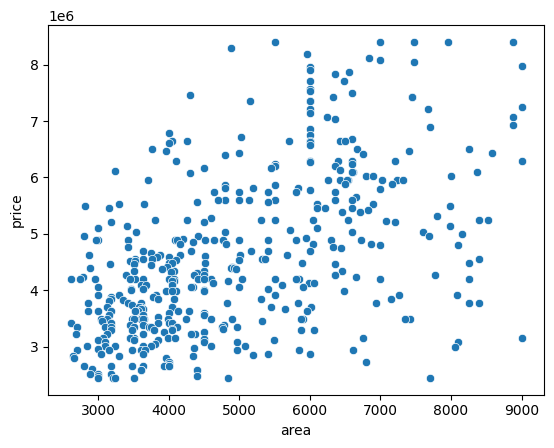

In [9]:
sns.scatterplot(dataset_without_outliers, x='area', y='price')

In [10]:
X = dataset_without_outliers.drop('price', axis=1)
y = dataset_without_outliers['price']

In [11]:
X.shape

(450, 12)

In [12]:
y.shape

(450,)

In [13]:
cols_with_missing = [col 
                     for col in X.columns
                       if X[col].isnull().any()]
print(cols_with_missing)

[]


In [14]:
def contains_strings(column):
    return any(isinstance(value, str) for value in column)

In [15]:
columns_with_strings = [column for column in X.columns if contains_strings(X[column])]

string = []

if columns_with_strings:
    for column in columns_with_strings:
        string.append(column)
    print(string)
else:
    print("No columns contain string values.")

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [16]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
27,8875,3,1,1,yes,no,no,no,no,1,no,semi-furnished
28,7950,5,2,2,yes,no,yes,yes,no,2,no,unfurnished
29,5500,4,2,2,yes,no,yes,no,yes,1,yes,semi-furnished
30,7475,3,2,4,yes,no,no,no,yes,2,no,unfurnished
31,7000,3,1,4,yes,no,no,no,yes,2,no,semi-furnished


In [17]:
string.remove("furnishingstatus")
print(string)

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']


In [18]:
from sklearn.preprocessing import LabelEncoder

for col in string:
    label_encoder = LabelEncoder()
    X[col] = label_encoder.fit_transform(X[col])

In [19]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
27,8875,3,1,1,1,0,0,0,0,1,0,semi-furnished
28,7950,5,2,2,1,0,1,1,0,2,0,unfurnished
29,5500,4,2,2,1,0,1,0,1,1,1,semi-furnished
30,7475,3,2,4,1,0,0,0,1,2,0,unfurnished
31,7000,3,1,4,1,0,0,0,1,2,0,semi-furnished


In [20]:
arr = X['furnishingstatus']

df = pd.DataFrame(arr)
df

,furnishingstatus
27,semi-furnished
28,unfurnished
29,semi-furnished
30,unfurnished
31,semi-furnished
...,...
516,unfurnished
517,unfurnished
518,unfurnished
519,unfurnished


In [21]:
one_hot_encoded_df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

print(one_hot_encoded_df)

     furnishingstatus_semi-furnished  furnishingstatus_unfurnished
27                              True                         False
28                             False                          True
29                              True                         False
30                             False                          True
31                              True                         False
..                               ...                           ...
516                            False                          True
517                            False                          True
518                            False                          True
519                            False                          True
520                            False                          True

[450 rows x 2 columns]


In [22]:
X = X.drop('furnishingstatus', axis=1)
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
27,8875,3,1,1,1,0,0,0,0,1,0
28,7950,5,2,2,1,0,1,1,0,2,0
29,5500,4,2,2,1,0,1,0,1,1,1
30,7475,3,2,4,1,0,0,0,1,2,0
31,7000,3,1,4,1,0,0,0,1,2,0


In [23]:
X = pd.concat([X, one_hot_encoded_df], axis=1)
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
27,8875,3,1,1,1,0,0,0,0,1,0,True,False
28,7950,5,2,2,1,0,1,1,0,2,0,False,True
29,5500,4,2,2,1,0,1,0,1,1,1,True,False
30,7475,3,2,4,1,0,0,0,1,2,0,False,True
31,7000,3,1,4,1,0,0,0,1,2,0,True,False


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
from sklearn.preprocessing import StandardScaler  

st = StandardScaler()  
X_train = st.fit_transform(X_train)  
X_test= st.transform(X_test)  

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    R2 = r2_score(y_test, y_pred)
    return mae, mse, rmse, R2

In [28]:
results = {}

for name, model in models.items():
    mae, mse, rmse, R2 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2 Score': R2}

In [29]:
for model, metrics in results.items():
    print(f"Model: {model}")
    
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")

Model: Linear Regression
  MAE: 625245.6144386649
  MSE: 719315949051.5527
  RMSE: 848124.9607525725
  R2 Score: 0.6458087112761846
Model: Random Forest
  MAE: 650603.3281481481
  MSE: 794651393632.8018
  RMSE: 891432.2148278027
  R2 Score: 0.608713526277163
Model: Gradient Boosting
  MAE: 611057.265717824
  MSE: 754086099245.3572
  RMSE: 868381.309820379
  R2 Score: 0.6286878837420498


In [30]:
best_model = RandomForestRegressor()
best_model.fit(X_train, y_train)

RandomForestRegressor()

In [31]:
y_pred = best_model.predict(X_test)

In [32]:
mae = mean_absolute_error(y_test, y_pred)
mae

647168.3166666667

In [33]:
mse = mean_squared_error(y_test, y_pred)
mse

804360986315.6226

In [34]:
rmse = np.sqrt(mse)
rmse

896861.7431441831

In [35]:
R2 = r2_score(y_test, y_pred)
R2

0.6039325212822839

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


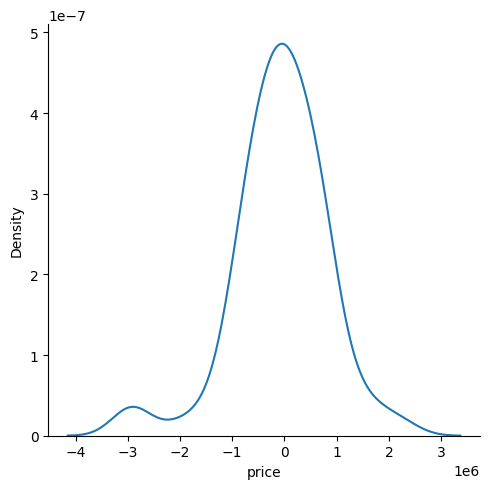

In [36]:
import seaborn as sns

sns.displot(y_pred - y_test, kind='kde')

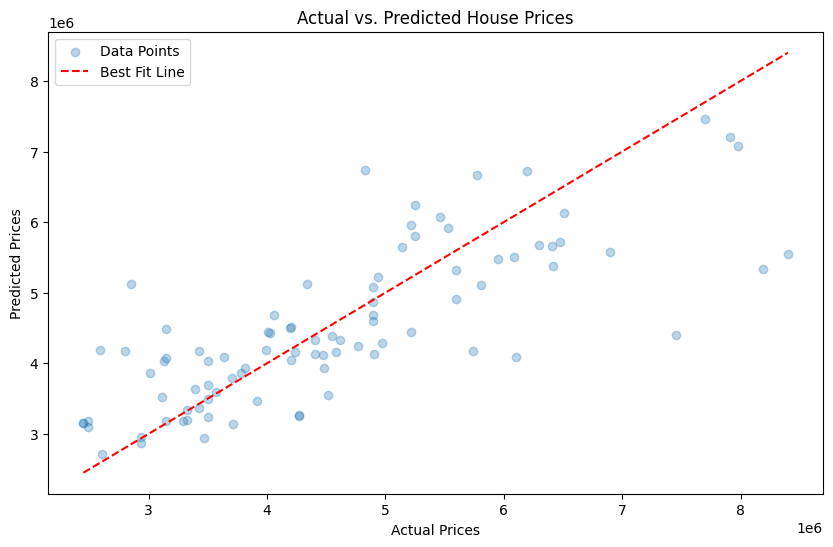

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices')

plt.legend(['Data Points', 'Best Fit Line'], loc='upper left')
plt.show()